In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/truthseekertwitterdataset2023/Truth_Seeker_Model_Dataset.csv
/kaggle/input/truthseekertwitterdataset2023/Twitter Analysis.csv
/kaggle/input/truthseekertwitterdataset2023/readme.txt


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/truthseekertwitterdataset2023/Truth_Seeker_Model_Dataset.csv')

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree


In [3]:
# Drop the unnecessary 'Unnamed: 0' column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

missing_values, duplicates


(author                     0
 statement                  0
 target                     0
 BinaryNumTarget            0
 manual_keywords            0
 tweet                      0
 5_label_majority_answer    0
 3_label_majority_answer    0
 dtype: int64,
 0)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


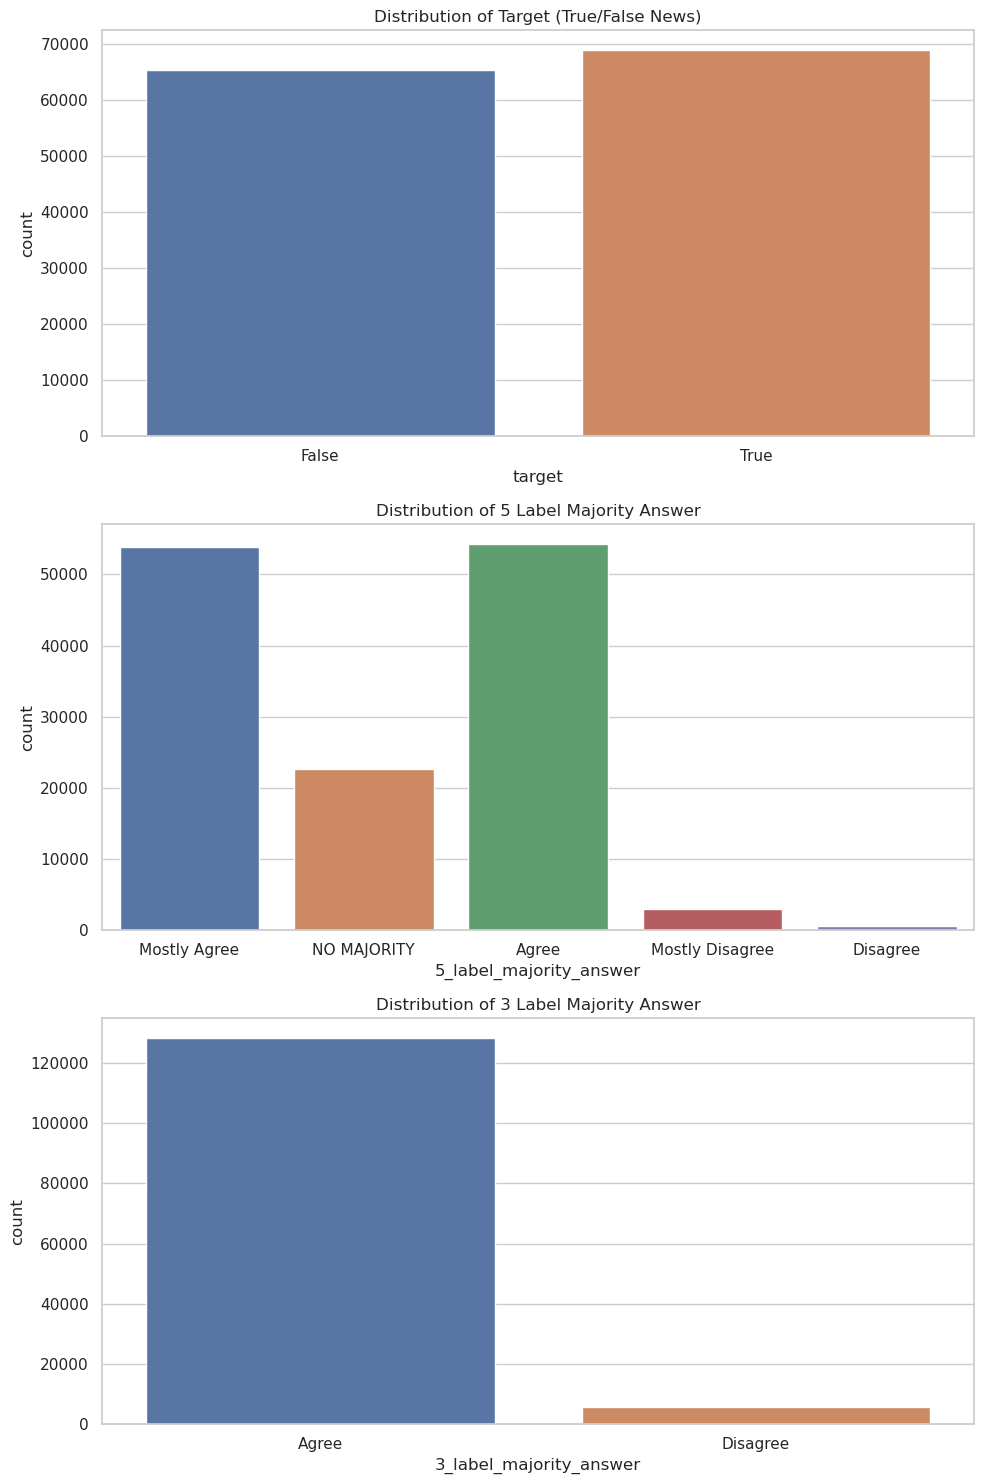

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create subplots
fig, ax =plt.subplots(3,1, figsize=(10,15))

# Bar plot for the distribution of target
sns.countplot(x="target", data=df, ax=ax[0])
ax[0].set_title('Distribution of Target (True/False News)')

# Bar plot for the distribution of 5_label_majority_answer
sns.countplot(x="5_label_majority_answer", data=df, ax=ax[1])
ax[1].set_title('Distribution of 5 Label Majority Answer')

# Bar plot for the distribution of 3_label_majority_answer
sns.countplot(x="3_label_majority_answer", data=df, ax=ax[2])
ax[2].set_title('Distribution of 3 Label Majority Answer')

plt.tight_layout()
plt.show()
